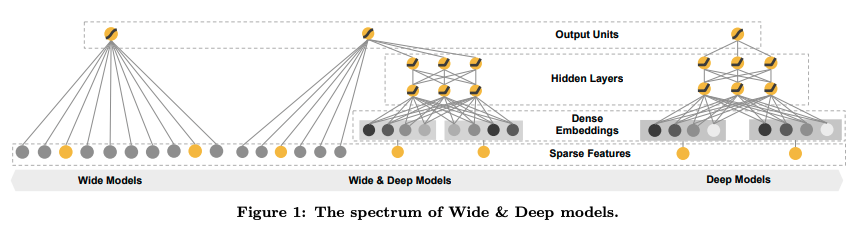

It's not an easy question to answer, but by jointly training a wide linear model (for memorization) alongside a deep neural network (for generalization), one can combine the strengths of both to bring us one step closer. At Google, we call it Wide & Deep Learning. It's useful for generic large-scale regression and classification problems with sparse inputs (categorical features with a large number of possible feature values), such as recommender systems, search, and ranking problems

Wide&Deep jointly trains wide linear models and deep neural networks to combine the benefits of memorization and generalization for real-world recommender systems. In summary, the wide component is a generalized linear model. The deep component is a feed-forward neural network. The deep and wide components are combined using a weighted sum of their output log odds as the prediction. This is then fed to a logistic loss function for joint training, which is done by back-propagating the gradients from the output to both the wide and deep part of the model simultaneously using mini-batch stochastic optimization. The AdaGrad optimizer is used for the wider part. The combined model is illustrated in the figure (center).

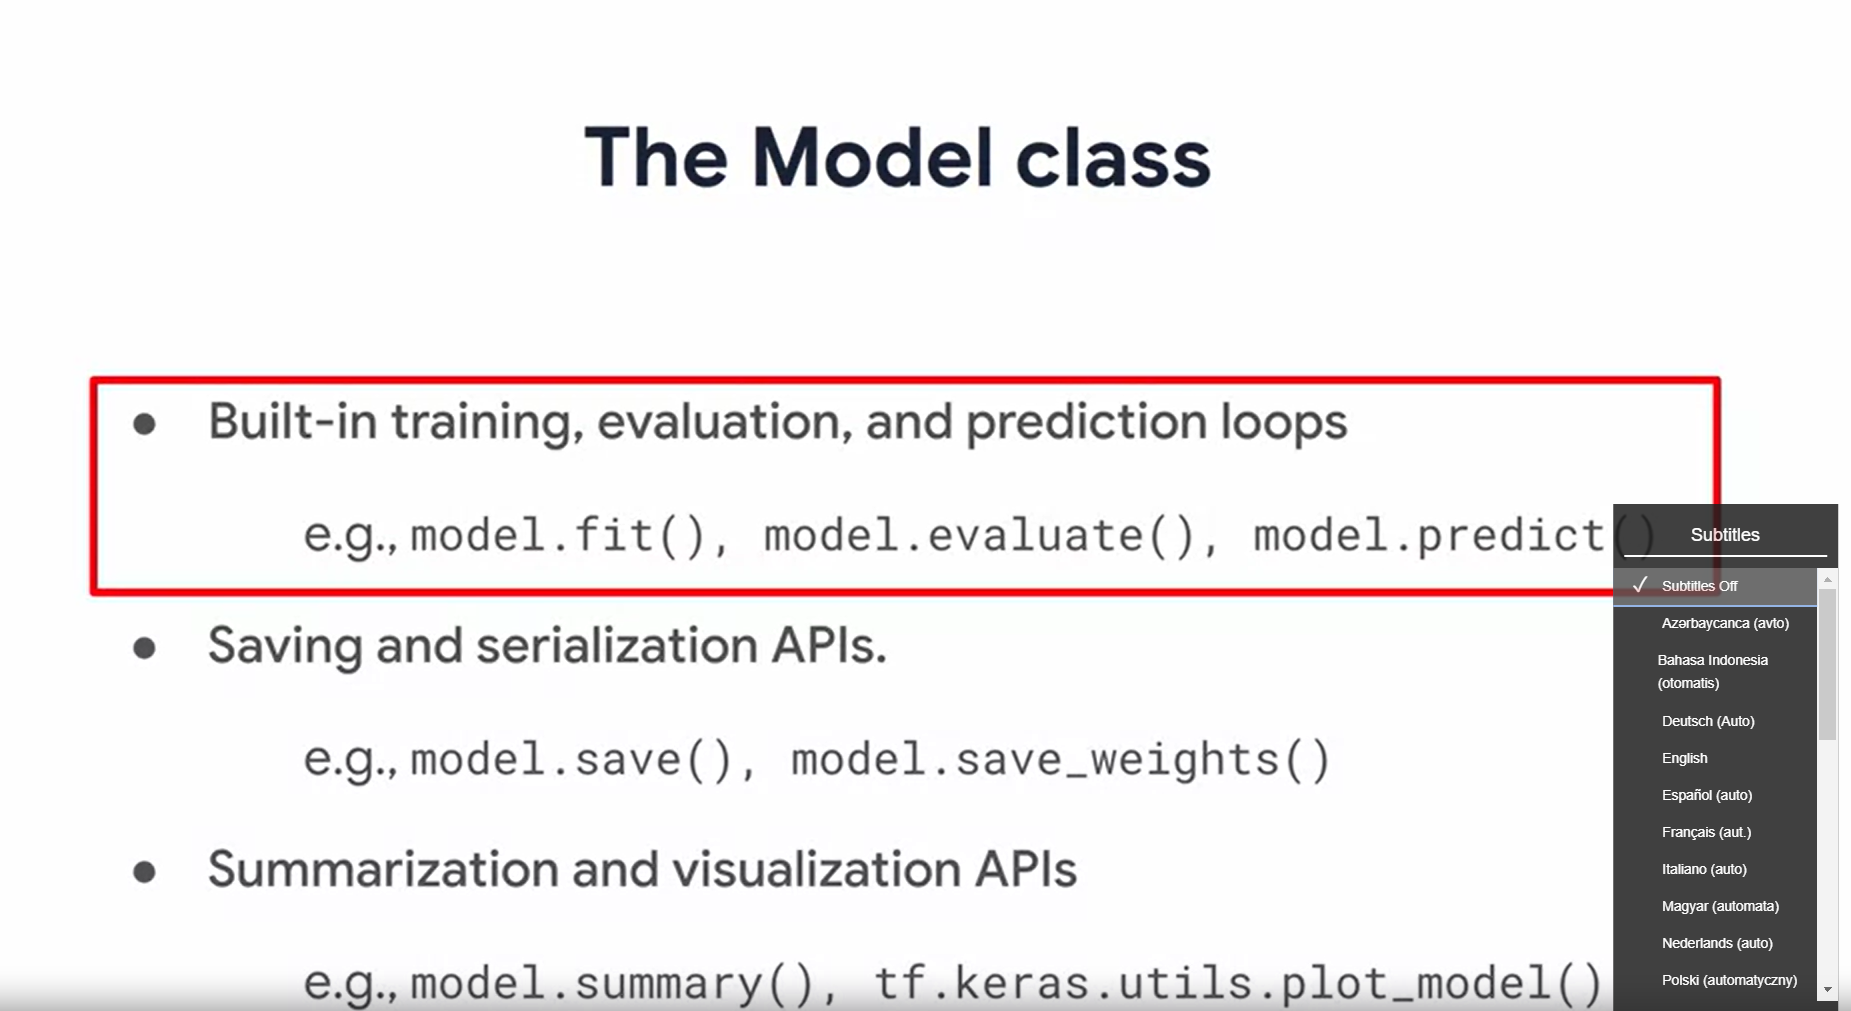

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model
# inherit from the Model base class
class WideAndDeepModel(Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        '''initializes the instance attributes'''
        super().__init__(**kwargs)
        self.hidden1 = Dense(units, activation=activation)
        self.hidden2 = Dense(units, activation=activation)
        self.main_output = Dense(1)
        self.aux_output = Dense(1)

    def call(self, inputs):
        '''defines the network architecture'''
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        
        return main_output, aux_output

model = WideAndDeepModel()


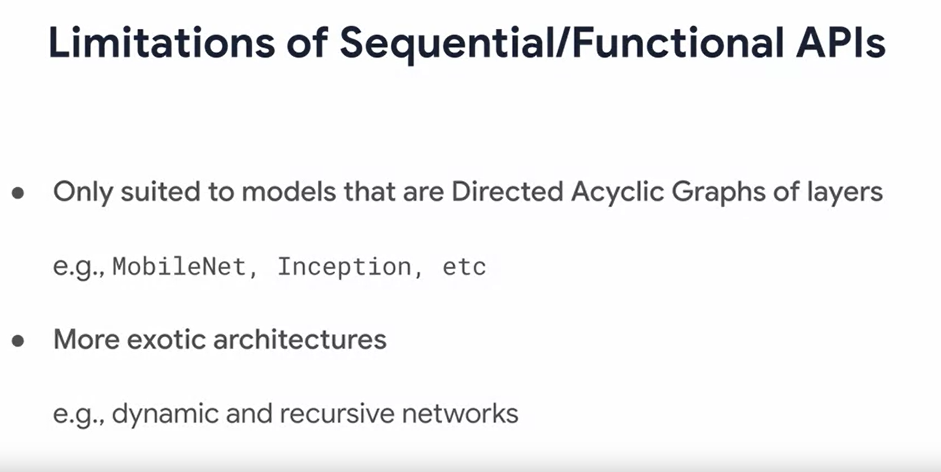
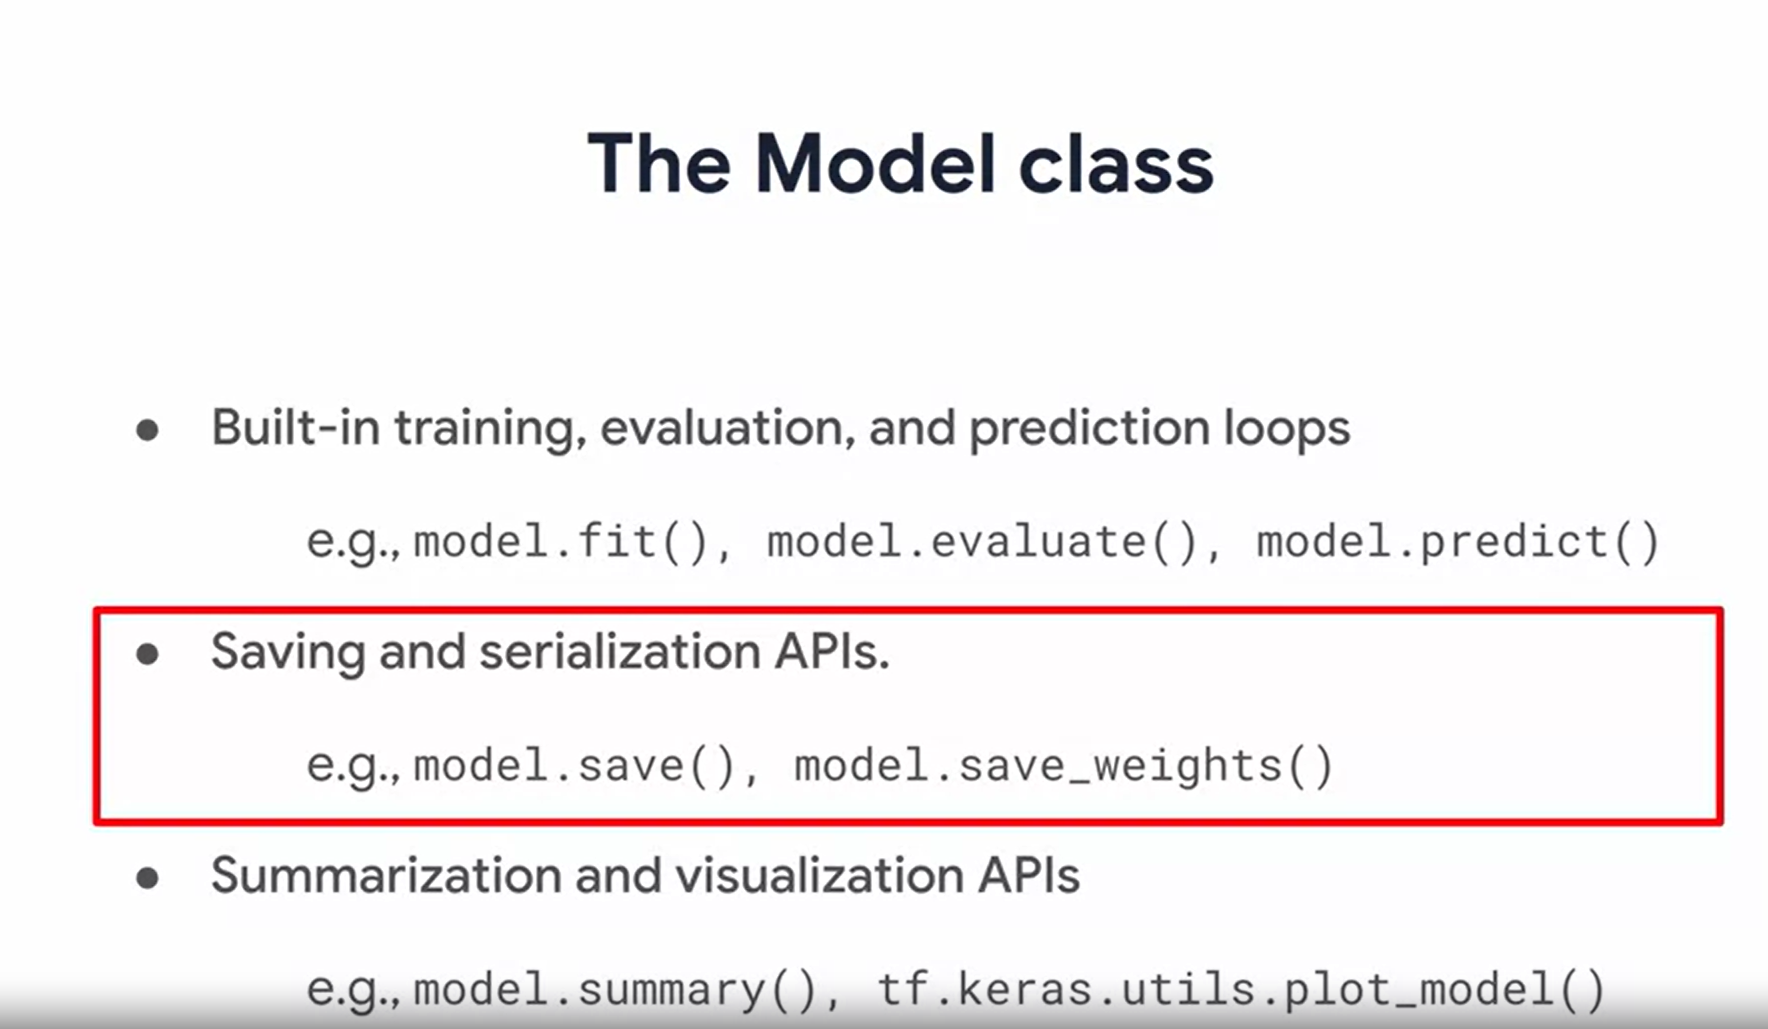
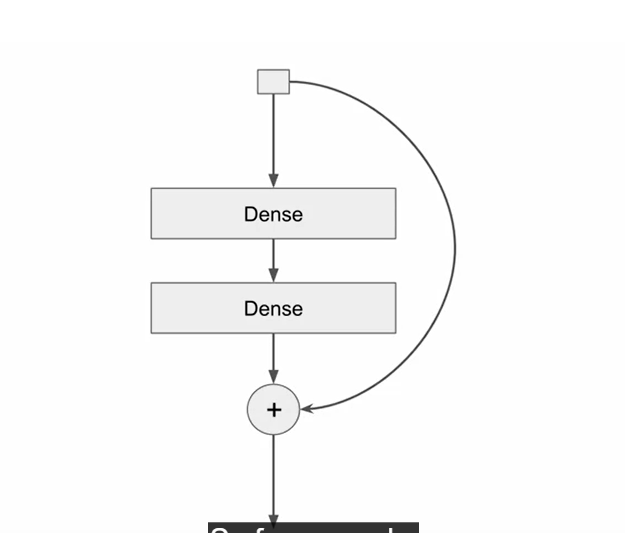
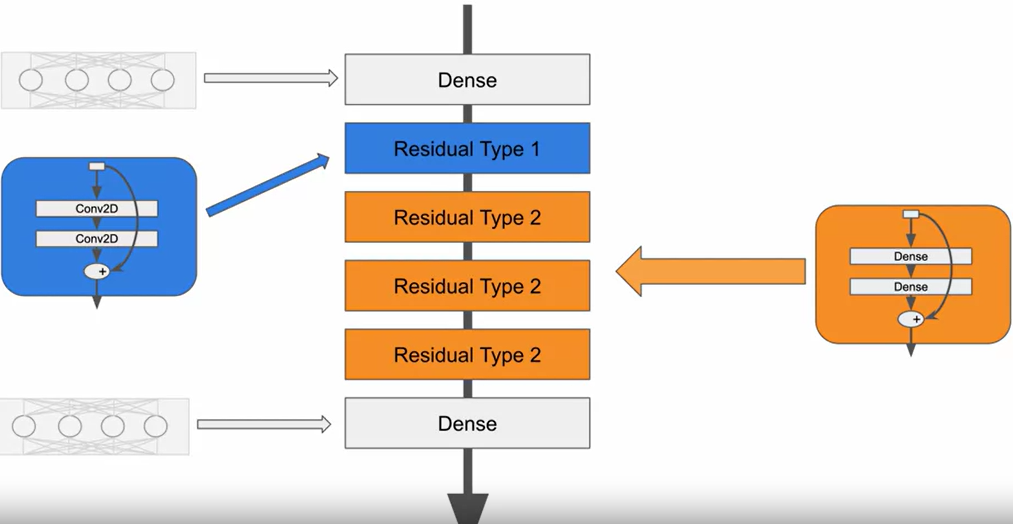
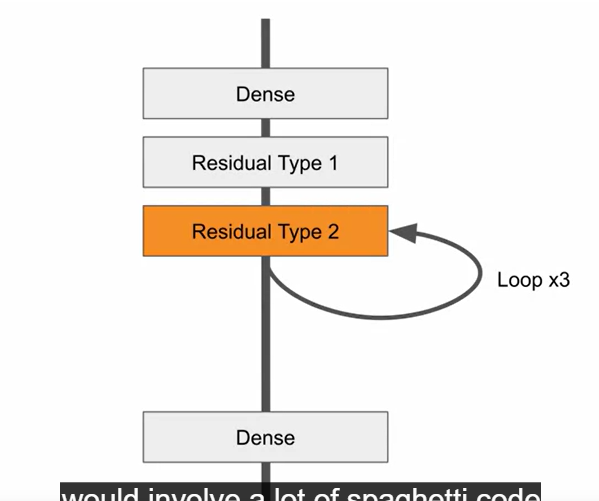
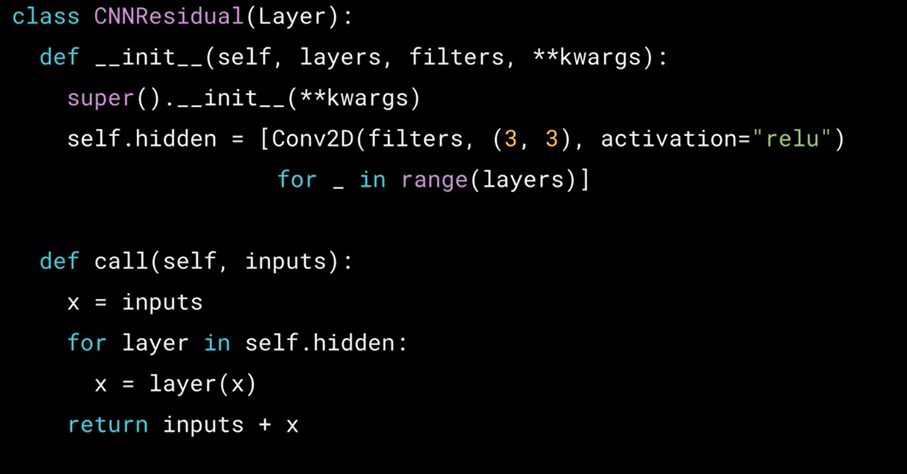

In [2]:
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Conv2D
import tensorflow as tf

class CNNResidual(Layer):
    def __init__(self, layers, filters, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [Conv2D(filters, (3,3), activation='relu') for _ in range(layers)]

    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        return inputs + x

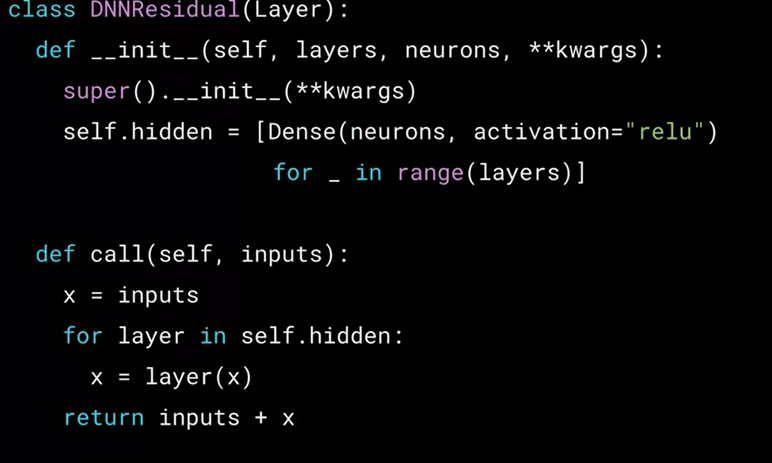

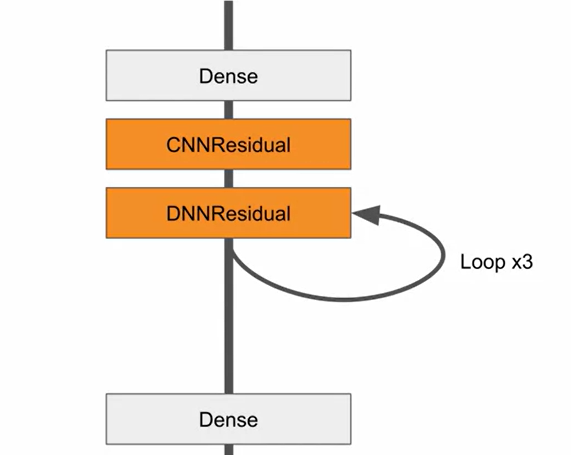

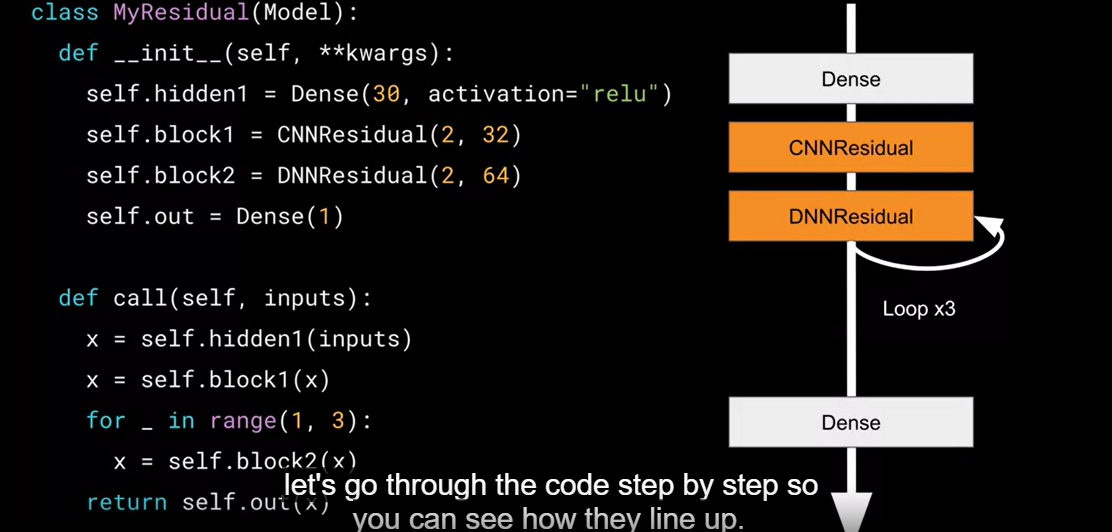

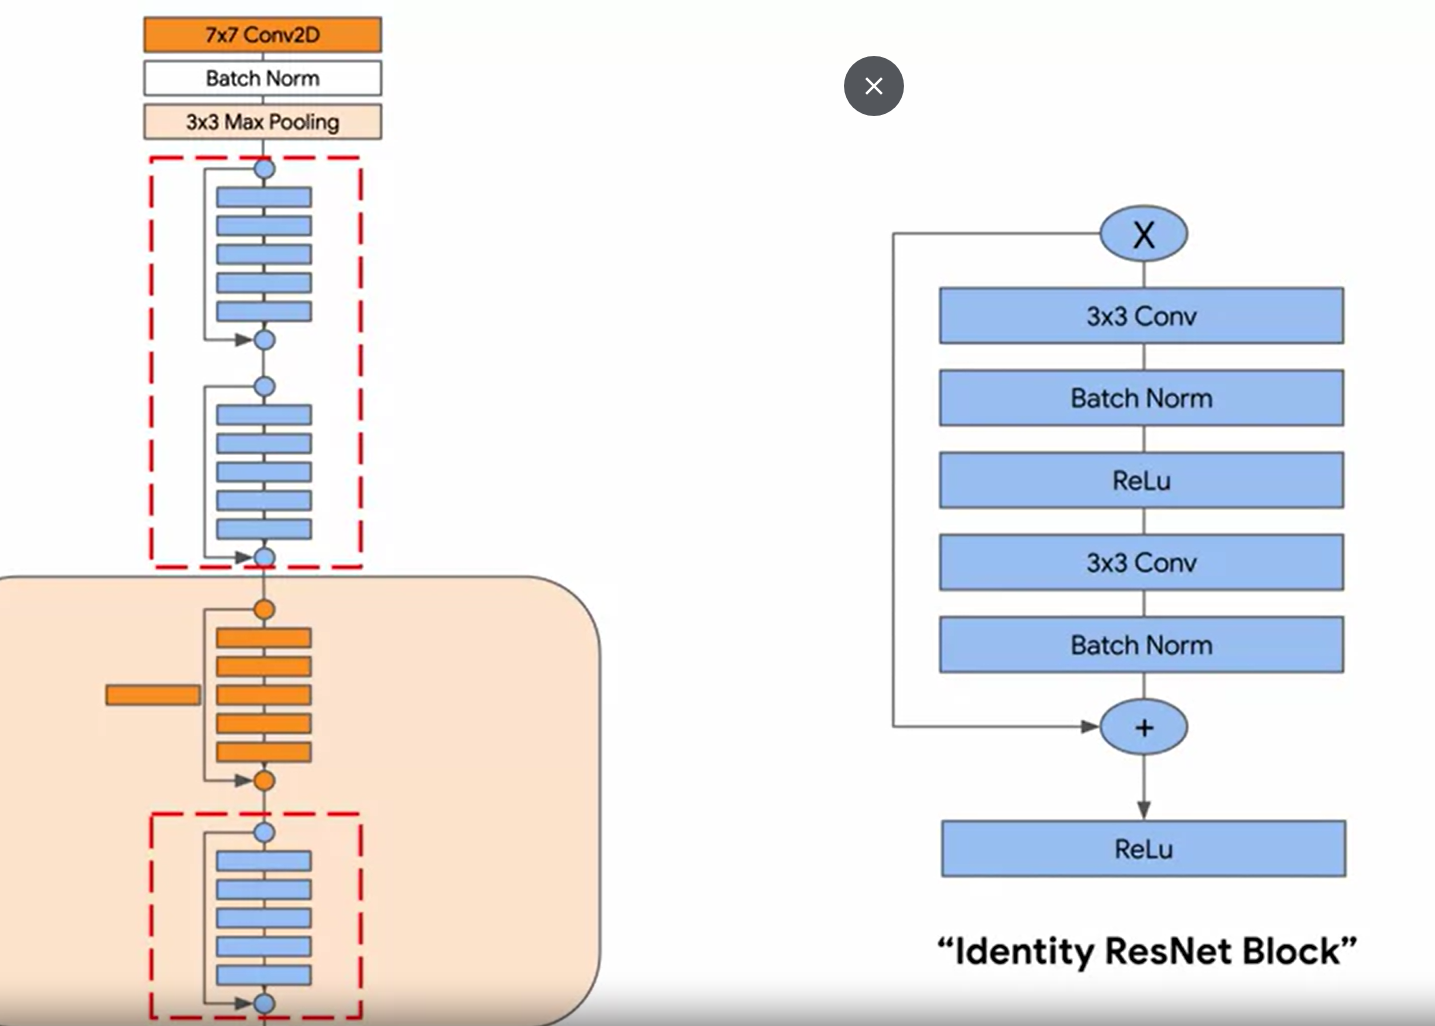
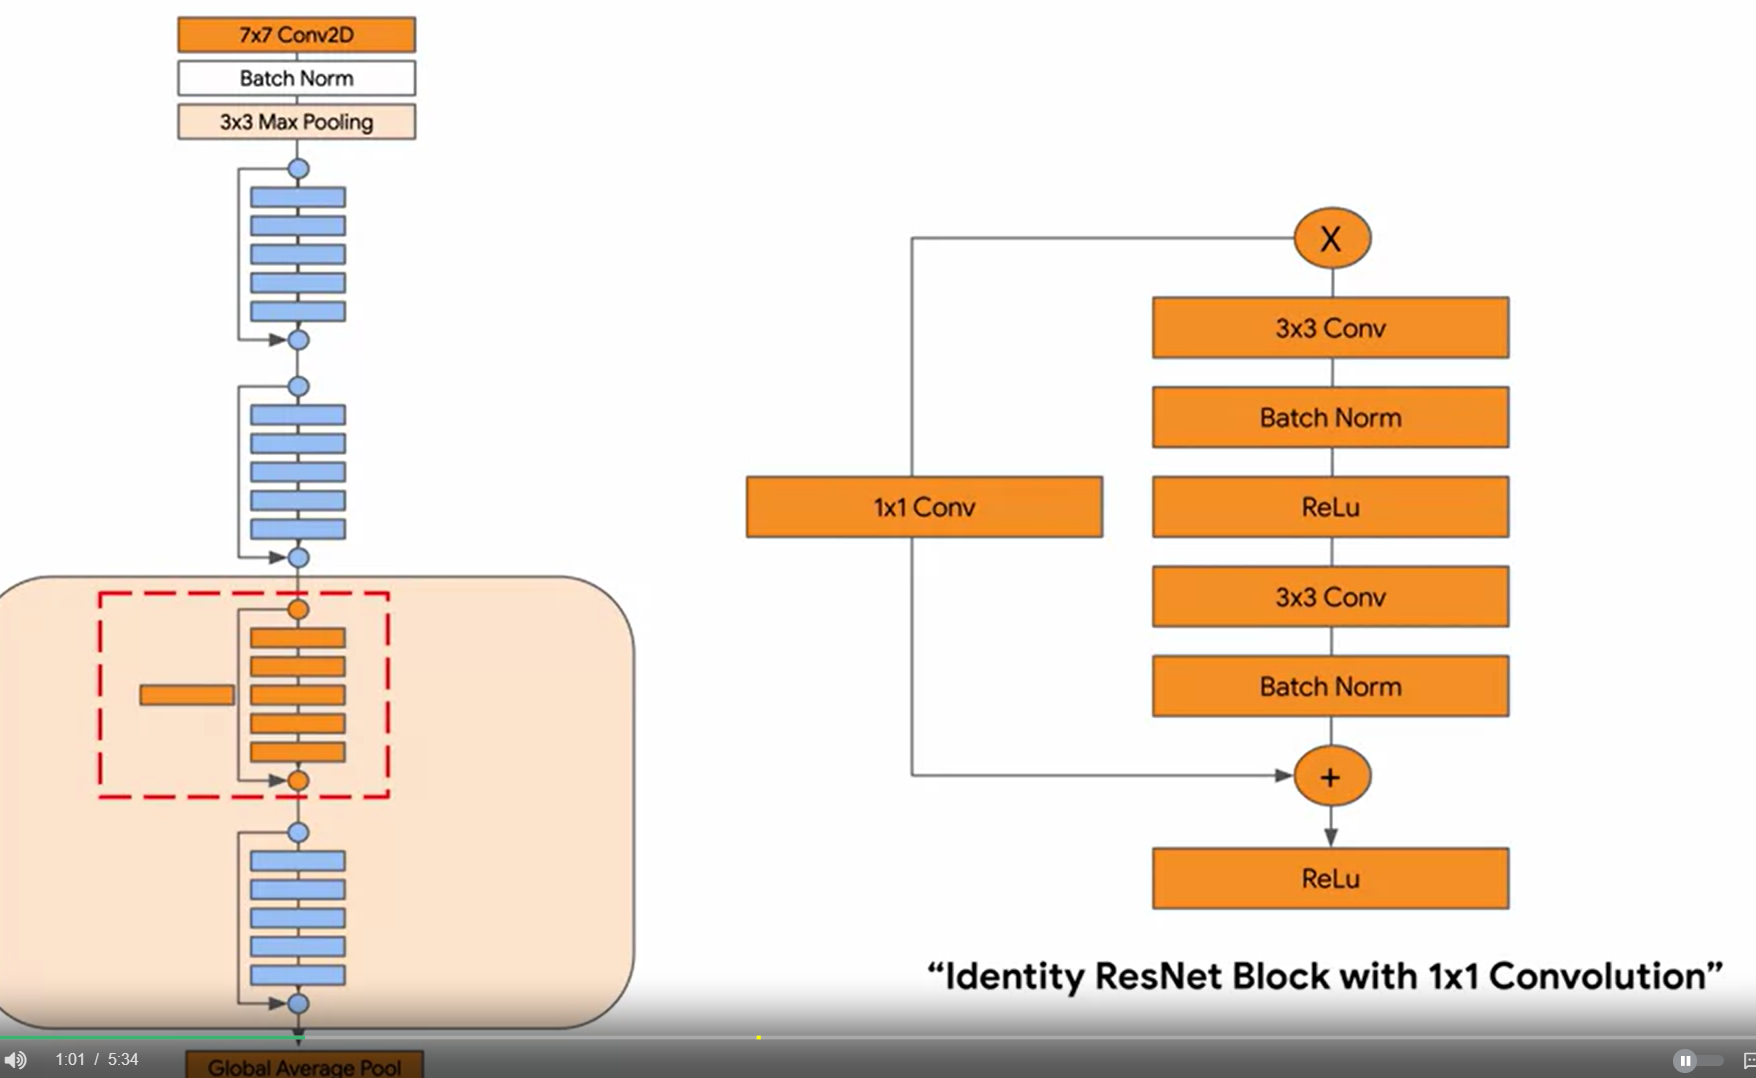
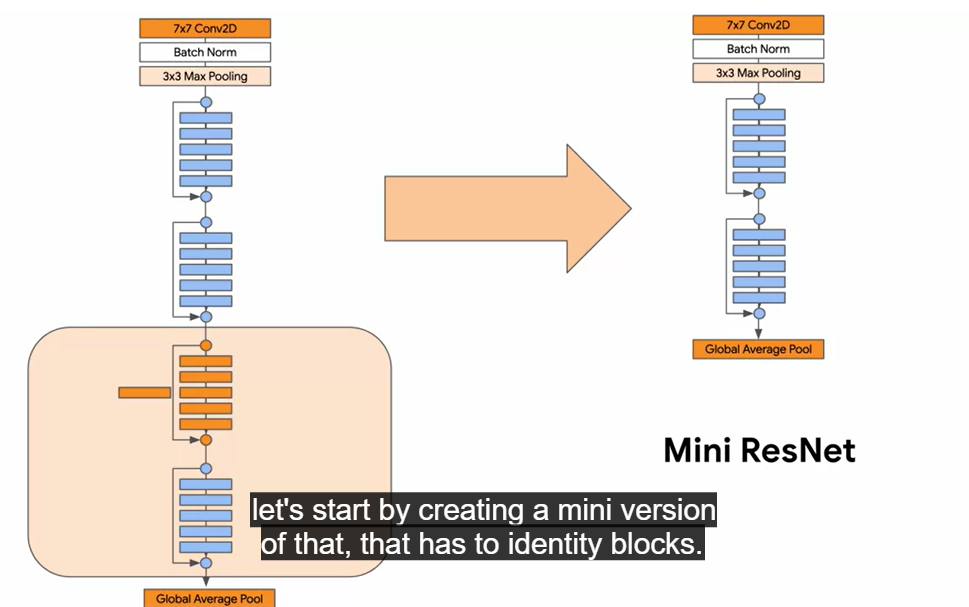

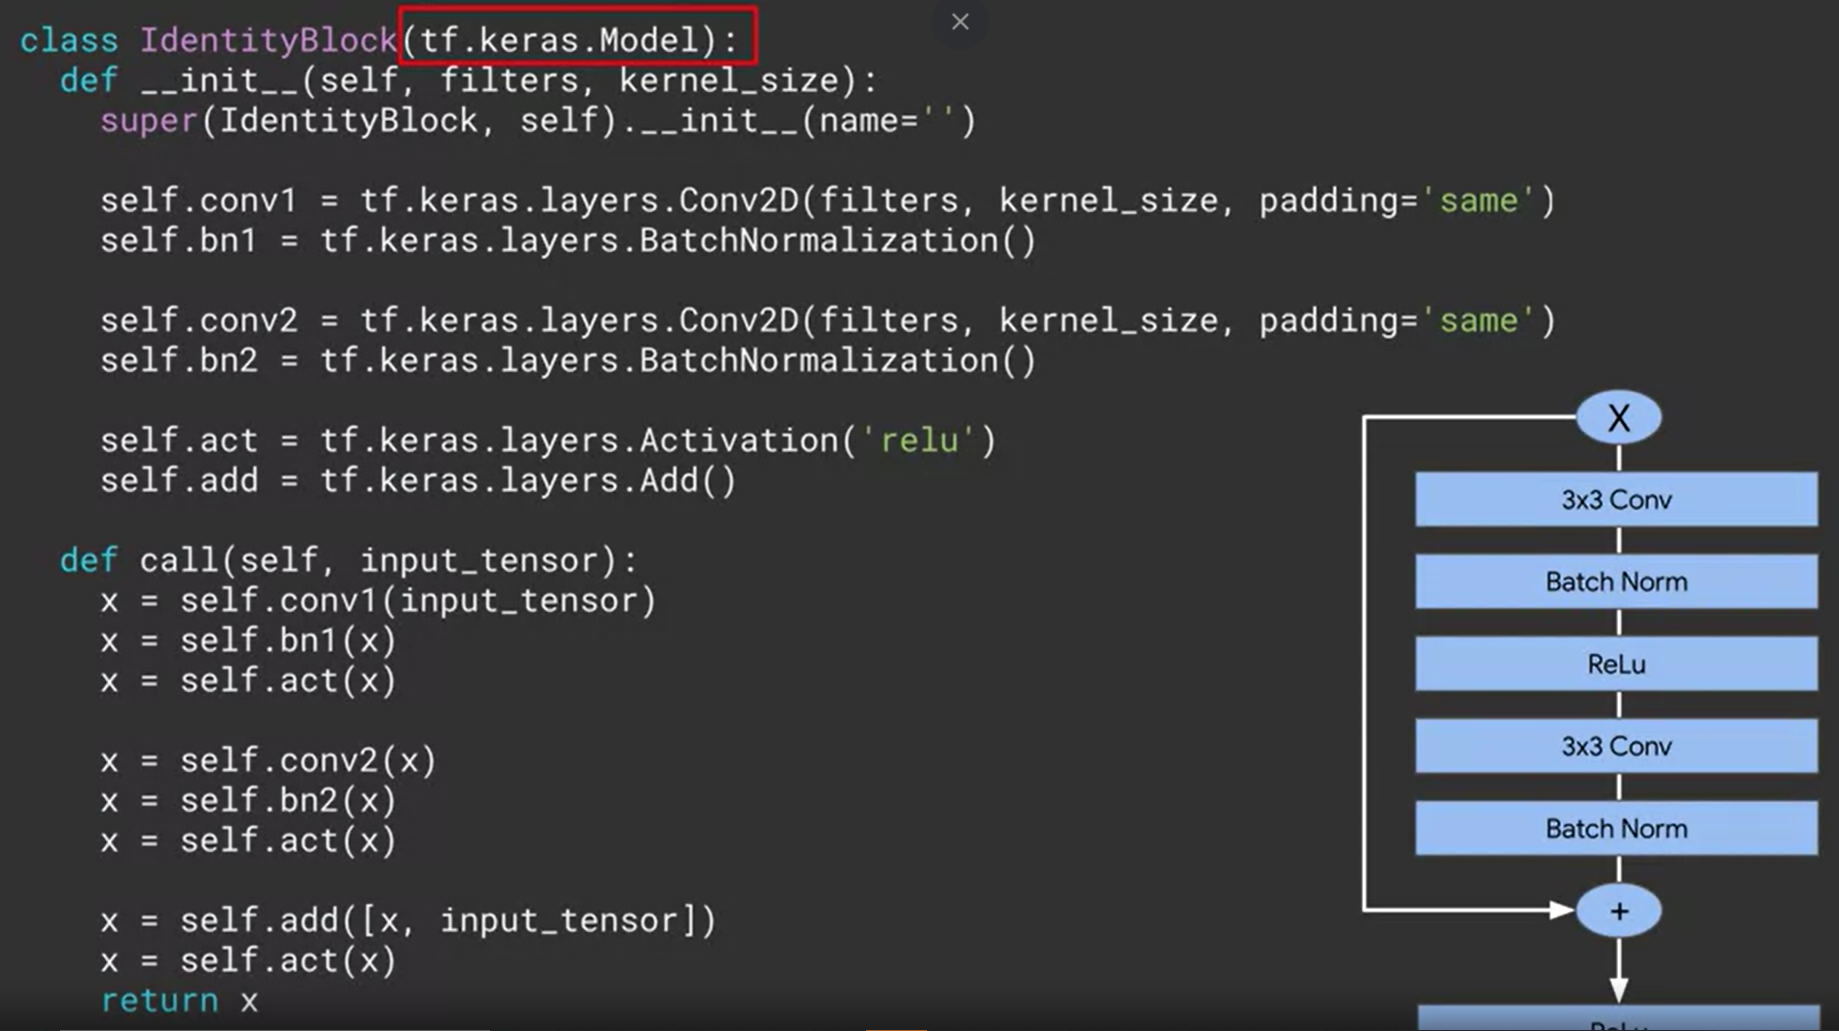

In [4]:
class IdentityBlock(tf.keras.Model):
    def __init__(self, filters, kernel_size):
        super(IdentityBlock, self).__init__(name='')
        self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')
        self.bn1 = tf.keras.layers.BatchNormalization()

        self.conv2 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')
        self.bn2 = tf.keras.layers.BatchNormalization()

        self.act = tf.keras.layers.Activation('relu')
        self.add = tf.keras.layers.Add()

    def call(self, input_tensor):
        x = self.conv1(input_tensor)
        x = self.bn1(x)
        x = self.act(x)

        x = self.conv2(x)
        x = self.bn2(x)

        x = self.add([x, input_tensor])
        x = self.act(x)
        return x

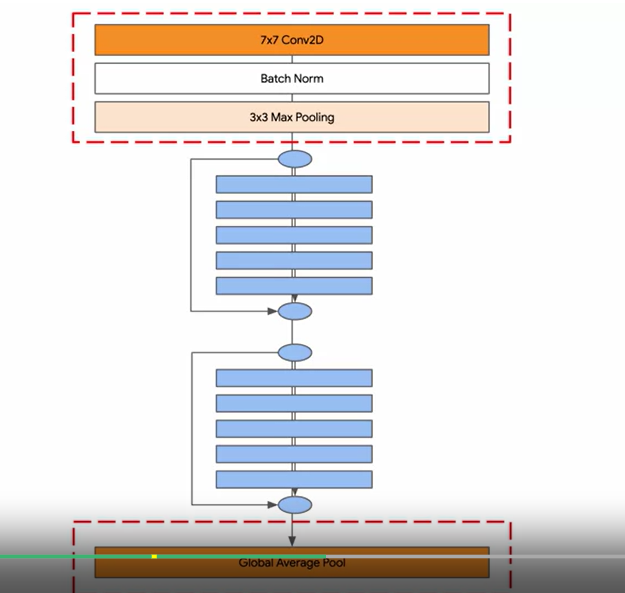
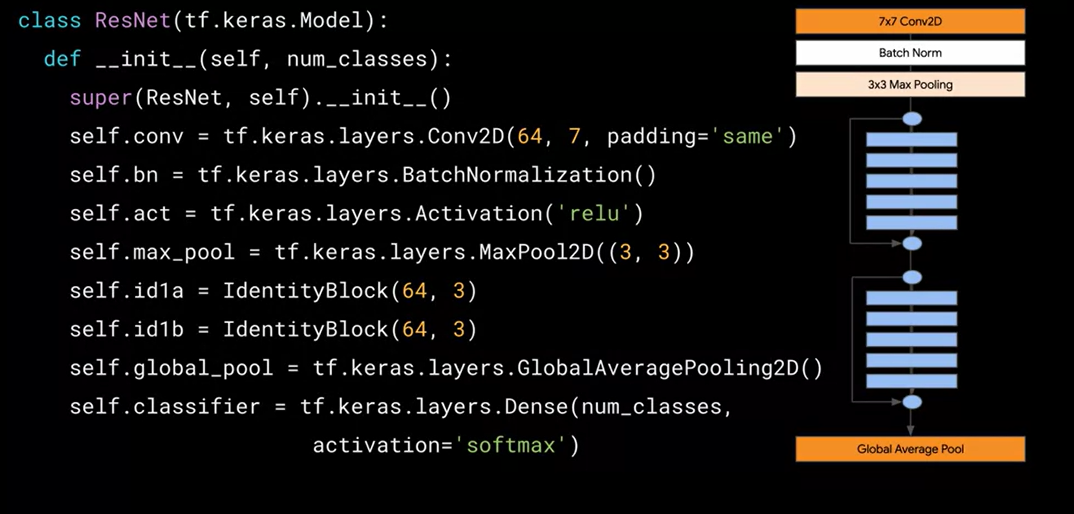
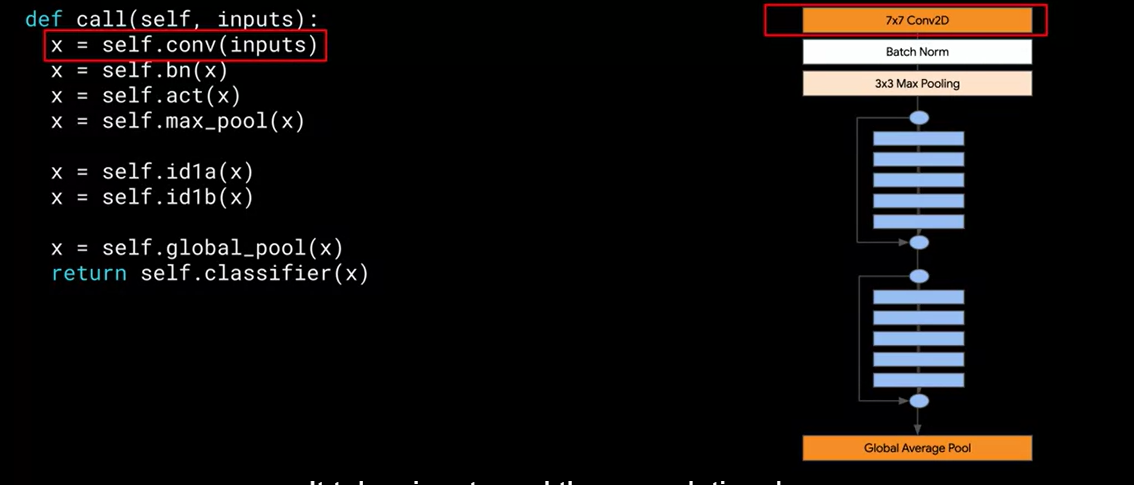

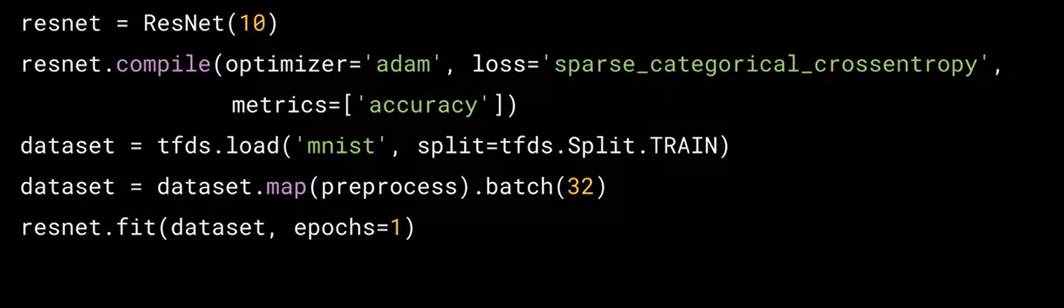